<a href="https://colab.research.google.com/github/disinikk/RBPLA_Kelompok6/blob/main/EPPPPPPPPPPPPPPPPPP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyLDAvis
!pip install gensim==4.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 11.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d06b540b7edd53f8cdb0dd57341e2959372c2594c9d66a8eeb1259583539e1cb
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=e1df24d14ce53d34b51fafe777c03ce7afde972fee8f1fca06c5aeda04193590
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████

In [ ]:
# -*- coding: utf-8 -*-
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim_models
import pickle
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

random_state = 0

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


In [ ]:
doc_set = """

biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
video diluar negeri wooiiii jangan ikut kadrun dong
lah kalau kadrun benci sama jokowi sekarang tuh pak
urusin buzzer oposisi kadrun suka bawa politik agama
ndasmu kadrun dongok
mantap broojangan dikasi celah kadrunmasuk
kadrun budak yaman iya
aman pakai kayak gitu kaum kadrun kenal film biru
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
yah kadrun anjing coba lari topik dibahas soal penghinaan presiden kadrun fokus jangan bodoh
kadrun kejang mereka siap lawan wkwkwk
kelakuan kadrun indonesia
apapun untuk bahan provokasi fitnahitulah kerjaan kadrun
kadrun apa sih
panik iya kadrun dilihat fotonya ah sudahlah
kadrun beraninya medsos kalau bicara ngeri di dunia nyata aslinya kaya ayam sayur
dih punya kata kadrun nongol
apapun jadi bahan provokasidan fitnah kerjaan kadrun
yang lihat kadrun di situ
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
video diluar negeri wooiiii jangan ikut kadrun dong
lah kalau kadrun benci sama jokowi sekarang tuh pak
urusin buzzer oposisi kadrun suka bawa politik agama
ndasmu kadrun dongok
mantap broojangan dikasi celah kadrunmasuk
kadrun budak yaman iya
aman pakai kayak gitu kaum kadrun kenal film biru
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
yah kadrun anjing coba lari topik dibahas soal penghinaan presiden kadrun fokus jangan bodoh
kadrun kejang mereka siap lawan wkwkwk
kelakuan kadrun indonesia
apapun untuk bahan provokasi fitnahitulah kerjaan kadrun
kadrun apa sih
panik iya kadrun dilihat fotonya ah sudahlah
kadrun beraninya medsos kalau bicara ngeri di dunia nyata aslinya kaya ayam sayur
dih punya kata kadrun nongol
apapun jadi bahan provokasidan fitnah kerjaan kadrun
yang lihat kadrun di situ
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
sombong to pamer mobil indonesia punya mobil banyak mau nu muhamadiyah kadrun cebong semua sama
jangan lupa masing bawa spanduk kecil anies for presiden cebong wktu gbk pkde periode dijamin cebong tambah kalap
lah emang apa kadrun menganggap cebong sesama anak bangsa narasi narasi kebencian bangun kadrun luar biasa pula kebencian cebong kadrun sebatas di didumay di dunia nyata
cebong lagicebong
ngak asal ngebacot cebong boxxx tolxx buzzer cebiii kalian asal komentar berbobot termasuk kamu cebong merasa terusik kalau junjungan nya yang protes dasar cebong kampungan luuu perlu nambah wawasan cebong biar perasaan luu ngak tersiksa
patut ditiru kalau berkumpul cebong monas nusantara bersatu gbk tanggal pasti deh kadrun ciut nyalinya mengadakan reuni cuma berkhayal
setuju saudara laki-laki tugas cebong menghujat memfitnah ngomporin adudomba sama rasis nah jualan cebong dibayarnya mahal
boikot produk cebong si rapi lngsung panas dingin
cebong mencerdaskan anak bangsa walo dilawan fitnah kadrun pendatang migran membodohi anak bangsa provokasi memecah belah
syarat jadi cebong cuma bodoh
presiden bukan sibuk gak gak ikn terus berjalan boleh mangkrak makanya presiden perlu mempersiapkan calon presiden mampu bekerja serius menangani pembangunan yang sedang berjalan lancar normalisasi kali gak dilanjutkan anies pdhl banjir
orang antri sembilan bahan pokok kelurahan dikasi caption duit wadas cebong bodoh langsung percata dssar tolol luh
cebong mukanya jelek iya
pembangunan ikn terus berjalan makanya dikawallah presiden penggantinya bukan presiden sibuk gak gak ikn gak mangkrak makanya jangan anies normalisasi kali gak teruskan ikn butuh serius bekerja bangsa negara
percaya paling berbohong doang namanya cebong mana yang benar
cebong ikut masuk goronggorong
terima kasih tni
iy biar chat pornodi kandang kambingyg penting cebong penyembah kolor tiang jemuran ttp semangathidup penyembah kolor tiang jemuran
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
sombong to pamer mobil indonesia punya mobil banyak mau nu muhamadiyah kadrun cebong semua sama
jangan lupa masing bawa spanduk kecil anies for presiden cebong wktu gbk pkde periode dijamin cebong tambah kalap
lah emang apa kadrun menganggap cebong sesama anak bangsa narasi narasi kebencian bangun kadrun luar biasa pula kebencian cebong kadrun sebatas di didumay di dunia nyata
cebong lagicebong
ngak asal ngebacot cebong boxxx tolxx buzzer cebiii kalian asal komentar berbobot termasuk kamu cebong merasa terusik kalau junjungan nya yang protes dasar cebong kampungan luuu perlu nambah wawasan cebong biar perasaan luu ngak tersiksa
patut ditiru kalau berkumpul cebong monas nusantara bersatu gbk tanggal pasti deh kadrun ciut nyalinya mengadakan reuni cuma berkhayal
setuju saudara laki-laki tugas cebong menghujat memfitnah ngomporin adudomba sama rasis nah jualan cebong dibayarnya mahal
boikot produk cebong si rapi lngsung panas dingin
cebong mencerdaskan anak bangsa walo dilawan fitnah kadrun pendatang migran membodohi anak bangsa provokasi memecah belah
syarat jadi cebong cuma bodoh
presiden bukan sibuk gak gak ikn terus berjalan boleh mangkrak makanya presiden perlu mempersiapkan calon presiden mampu bekerja serius menangani pembangunan yang sedang berjalan lancar normalisasi kali gak dilanjutkan anies pdhl banjir
orang antri sembilan bahan pokok kelurahan dikasi caption duit wadas cebong bodoh langsung percata dssar tolol luh
cebong mukanya jelek iya
pembangunan ikn terus berjalan makanya dikawallah presiden penggantinya bukan presiden sibuk gak gak ikn gak mangkrak makanya jangan anies normalisasi kali gak teruskan ikn butuh serius bekerja bangsa negara
percaya paling berbohong doang namanya cebong mana yang benar
cebong ikut masuk goronggorong
terima kasih tni
iy biar chat pornodi kandang kambingyg penting cebong penyembah kolor tiang jemuran ttp semangathidup penyembah kolor tiang jemuran
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
sombong to pamer mobil indonesia punya mobil banyak mau nu muhamadiyah kadrun cebong semua sama
jangan lupa masing bawa spanduk kecil anies for presiden cebong wktu gbk pkde periode dijamin cebong tambah kalap
lah emang apa kadrun menganggap cebong sesama anak bangsa narasi narasi kebencian bangun kadrun luar biasa pula kebencian cebong kadrun sebatas di didumay di dunia nyata
cebong lagicebong
ngak asal ngebacot cebong boxxx tolxx buzzer cebiii kalian asal komentar berbobot termasuk kamu cebong merasa terusik kalau junjungan nya yang protes dasar cebong kampungan luuu perlu nambah wawasan cebong biar perasaan luu ngak tersiksa
patut ditiru kalau berkumpul cebong monas nusantara bersatu gbk tanggal pasti deh kadrun ciut nyalinya mengadakan reuni cuma berkhayal
setuju saudara laki-laki tugas cebong menghujat memfitnah ngomporin adudomba sama rasis nah jualan cebong dibayarnya mahal
boikot produk cebong si rapi lngsung panas dingin
cebong mencerdaskan anak bangsa walo dilawan fitnah kadrun pendatang migran membodohi anak bangsa provokasi memecah belah
syarat jadi cebong cuma bodoh
presiden bukan sibuk gak gak ikn terus berjalan boleh mangkrak makanya presiden perlu mempersiapkan calon presiden mampu bekerja serius menangani pembangunan yang sedang berjalan lancar normalisasi kali gak dilanjutkan anies pdhl banjir
orang antri sembilan bahan pokok kelurahan dikasi caption duit wadas cebong bodoh langsung percata dssar tolol luh
cebong mukanya jelek iya
pembangunan ikn terus berjalan makanya dikawallah presiden penggantinya bukan presiden sibuk gak gak ikn gak mangkrak makanya jangan anies normalisasi kali gak teruskan ikn butuh serius bekerja bangsa negara
percaya paling berbohong doang namanya cebong mana yang benar
cebong ikut masuk goronggorong
terima kasih tni
iy biar chat pornodi kandang kambingyg penting cebong penyembah kolor tiang jemuran ttp semangathidup penyembah kolor tiang jemuran
hahahamemang begitulah nasib artis panggilan syuting dijemput jam jam pagi tahu tetangga tmn begitu ngomong-ngomong pilot pramugari begitu
c densi dasar cebong babi nolongjugakagaklu mlh ngejekindasar pemakan tulang
mantap izin ane share medsos biar cebong jadi pinter
susah memang kok banyak manusia begitu disana mustinya terima semua bantuan
orang bego bikin stats cebong
mustinya solaria nasi padang eh maaf duit besar turun untuk demo bela bohir untuk anaknya nyapres
lawan iru cebong laknat suka jaga gereja benci muslim
sesuai cocok
baru beli zenit gak nyombong cebong emang cebong sombong
kerjaan kok demo katanya ulama ulama banyak berbuat bangsa negara bukan bisnis bela bohir bisnis demo sekalinya dakwah provokasi menjelekan orang mengkritik dikejar dihajar pertanyaannya kalian punya tuhan gak kok gak malunya
cebong bohong tiap hari apa hitam tuh hatinya katanya survey menang terus kok ketakutan sama anies
cepaaar alias cebong parah
kayak gini dari dulu banyak pengungsi memiliki pakaian pengungsi pilih pakaian dia suka layaknya toko pakaian disumbang disortir momen ini dipakai penyumbang membuang pakaian bekas banyak tidak layak
cebong babi jamban kasta terendah menjijikkan
tingkat cebong
cebong sama cebong nya bertengkar
cebong arti oligharchy gak paham sebenarnya jadi asal nuduh
korupsi ektp sdh dicacimaki doyan porno sdh terbuktiyg survey grob cebong armando sdh jugaaplg
editan ala cebong munculqkqkq
komunis berkedok peci sangat membenci muslim cebong laknat
saya para cebong
rupanya banyak kadrun nyamar jadi cebong mengaku paling nkri padahal pengkhianat itu menutupi siapa kamu sebenernya pada dasarnya membedakan cebong kadrun kualitas otak cara berpikir
ah cebong saja
mata cebong mah ketutup lumpur jelas gk lihat tosoalnya kelamaan dikolam butek dimaklumin butuh waktu lama buat melek
cebong bgo mobil prkran orng dsongongin
cebong suka bikin berita menghibur diri sbab hidup tiap hari faktanya baik baik tapi diberi pilihan hidup lebih baik dg meninggalkan pemimpin suka berbohong bahkan gengsi iya
cebong iblis bin dungu penyembah berhala kodok pemakan bipang turunan pki
gerombolan cebong ada istilah halal haram prinsipnya lakukan semau
bukan crazy rich cebong kalau punya esemka scuderia esemka aventador esemka chiron
kemarin gbk cebong diam kenapa gk mikirin cianjur dongok
sdgkan kamu sendiri penjahat kelamin nama firza husein apa malu wkwkwk dasar lonte cebong punya otak dungu semua
entar kesana dibilang memanfaatkan musibah cari simpati otak cebong nyocot bae nyumbang
emang kalau loyalis anies baswedan kok cebong kepanasan emang salah beda pilihan dg cebong lha bukan penggemar porno kok dipaksain gemar porno mabok kecubung kamu cebong
kalau lawan kodok cebong bagaimana saudara laki-laki
dr virus cebong
cebong tolol emang selama tahun dki dipimpin anies jadi hancur warga jakarta kelaparan
bicara se aliran makanya dibiarkan lagipula siapa yang provokasi cuma memberikan tahu bukan pihak cebong yang gak suka anis pihak kadrun ada jadi kesimpulannya adalahsemua pihak suka
cebong receh
cebong hutan
cebong tipu diri sendiri
penjahat kelamin jkpk md dn tokoh lainnya mrka ngrawan iya trmasuk penjahat kelamin aniesmrka aktv kahmijls latr blkng merka akademisipemikir ingin membuat perubhn dn kebikan ngricebongbuzzer cuma perut otkya bukn lvel
cebong makin stress pakai topi badut nanti mrk berorasi busana semakin naik stress nya
gobloknya cebong abadi
cebong halu berfoto depan mobil orang hahaha
jangan mengklaim gak onok sangkut pautny kesukuan
baca komen kecebong bikin pagi jadi berwarna tadinya percaya kalau indonesia pny iq trnyata idiot berlabel cebong bikin jadi iya sdh lah sabar th mari sambut presiden berijazah asli
sby ahy anies bukan pejabat negara bebas mau juga bukan pakai uang rakyat cebong tololnya smp kiamat
pedagangpenjual agama
yaaaang aneh sama pemuja sono katanya cebong sononya hebat mampu ciptakan mobnas tidak pernah lihat cebong cebong bli mobil esemka yaaa apa mobil esemka kalah bersaing sama kijang innova
kalau org bodoh suka kelakuan bodoh pemilik akun robot bodoh yakmakanya bilang cebong kadrun sama tololkl mah punya koleksi vudeo kelakuan bidoh gitu tidak penting saya sih cerdasqiqiqi
bahasa gk jauh dr bipang cebong babi cuihh
aku malu baca nya sendiri gk mampu urus tambang weleh padahal kemampuan itu kan katanya gubernur kok gk sih aneh skrng mau jadi pleciden kalau rahasia negara bocor gmn tuh salahin siapa dong cebong iya hhh
hay anjing kafir bangsat haram jadah cebong kaleng rombeng pki kamu yah berani sekali kamu menghina ummat islam bacotmu bicara sembarangan nantangin umat islam kamu yah tiap hari cuitanmu selalu lompat pagar babi loh
cebong kencing onta
hati hati di putar balik sama gerombolan cebongmereka berjasa kata nyakan cebong ahli nya ahli tipu tipuhehehe
modal gerombolan cebong senjata nya putar balik fakta fitnah bikin isu bohong besar besaran sebar adu domba politik identitas kata nya pancasilais eh rasisnya luar biasa penipu ulung
ane yakin suul cenul muslim shalatlawong tiap detik hujat hina fitnahbersama celeng gerombolanya cebong kulup
lah iya pribumi semua memang ge saja mendalami agama islam takut allah swt beda nya cebong pribumi mendalami aturan pemerintah jadi penjilat kesenangan dunia
cebong dadakan akun bernomor rekening kejar bonus akhir tahun
cebong dadakan akun bernomor rekening kejar bonus tahun baru
politik identitas yes politik pecah belah cebong no
yang bukan kaum kolem kaya kamu kaum cebong
mengerti kamu cebong binatang tolol jadi bukan warna bendera lgbt govlok makanya jadi otak jangan cuma buat cadangan dasar hewan
cebong mulai bersatu di tag peka otak nyampai spesifikasi rasa
cuitan khas babi cebong kalau gak pancasila nkri toleransi diluar anti pancasila intoleran khilafa kadrun padahal nkri sedang diobral aseng cebong diem bae
kamu gak punya duit apa gak punya otak buat mikir gak pernah jajan go iya waduh bahaya banyak kumpulan cebong tidak tahu cara pakai base seperti gini dibawa base
digantikan jenis cebong buzzerrp
makan diemperan foto wudhu foto olahraga cebong dianggap merakyat anies naik sepeda lain-lain kelihatannya norak kayak si rambut putih
udik shi kamu cebong bodok asal kamu tahu iya kalau cuman inova kalau papua jadi warung berjalan buat jual nasi kuning sama cendol pinggir jalan
kamu buzzer cebong berani nunjuk diri iya skrg siapa kamu sekarang mulai terang benderan siapa kalian dibalik sbg buzzer cebong kamu bela orang propokatif pemecah bela rakyat kamu bela bandingkan pki kadrun mengaku pancasila sbg kedok
benar ini cebong buzzerp
adudomba terusss cebong cebong
cebong radikal
mencari cebong hitamneh
cebong sirik kerja nya adu domba terus
koen picek moto picek pikiran picek cangkem cebong kadrun otak dungu gitu kok repot salam nkri
kebohongan cebong itk fitnah anies
cebong sirik euy heran
coba share nik kamu cebong biar bongkar bi checking kamu wkwkw gak heran lihat org bgini tahu utang nya berkali kali lipat lbh gede aset tenggat waktu tiba auto kismin wkwkwk
cebong tolol jotos
cebong asu emang bkin berita isu bohong melulu
lebih gemes pen jambak cebong tolol
inget raffi cebong
mang cebong kadang begonya gak ketulungan oramg nama dipanhgil jokodok
kelamaan kalau nunggu ajak tawuran sama banyak bicara jamban cebong tolol duluin yu ratain cebong tidak ngelunjak republik
bersih cebong buzzer terutama deni siregar
rakyat indonesia sebego kamu sangka cebong tolol ganjar perlu fitnah semua tahu peristiwa wadas den porno
si kafir cebong kaleng rombeng dulu kurang ajar selalu lompat pagar giliran lebel tendanya dirobek marahmarah
percuma lapor lapor jotos cebong bangsat takut apa sama cebong tolol
cebong tolol sama cebong tolol cakar cakaran gara gara makan bohong si banyak bicara jamban
kaum siapa kaum kadrun apa cebong apa sialan apa bipang
seru lihat cebong vs kadrun liatin orang bodoh bela nama politisi mati padahal dapat apa dari deh lebih baik indonesia dibagi buat cebong buat kadrun biar adil
ketelen cebong
cebong kalau lapar ceritanya hayalannya mirip komunis
mayoritas gitulah jadi anggap cebong semua terpengaruh media tv dsj
cebong paling ke tiongkok indonesia milik muslim cebong
koran abalabal jadikan rujukan dasar cebong cerdas
provokator kamu nyumbang dasar cebong kaleng rombeng
siapkan donasi terbaikmu dasar cebong lbh baik para kadrun kerja keras nasi bungkus karet kuning mkn dr mbl sm rumah gk bisa buat kenyang
kalau kebanyakan gaul cebong seorang dokterpun ternyata tertular virus toblo
biarkan cebong menghibur diri meski ketar ketir
jangan ah cebong makin stres
mungkin ngebuzzer jadi sampingan buat dr priono kebetulan wakil cebong dr tiffa wakil dr kadrun
cebong insafnya cepat gedenya iya nyie
terlalu banyak tahi disekitar jadi terbiasa najis bau kite bilang apa tidak kan dicium cebong iya biarkan kite bahkan makin menjauh bau soalnya
ternyata seragam ormas bikin cebong gerah di bantu mayoritas tanya bantuan bencana internasional berlebel agama ngotot banget mencantumkan lebel agama bahkan jadi curiga
hancur karier anak baru jadi cebong
seumpama tobat diterima gak jadi cebong
markas arsenal manchester city psg clup top papan atas eropa dunia milik kadrun bukan milik cebong babi
sialan hilang muncul kadrun kadrun hilang muncul apa iya cebong vs sialan cebong juara cebong vs kadrun siapa juara lihat hasilnya
donatur buanyak banget cebong anjingg
lantas cebong ikutan plesetin junjungannyawahsikut kiri sikut kanan ternyatajdi kelihatan asli penghianat nya
habis kariernya anak baru jadi cebong
ramai sendiri saya suka tampolan antara cebong sama org partai
berbau jokowi keok telak hanya cebong dungu masih nyaman dikibulin
makin gila cebong capresnya gak yang usung
mantap
cebamg cebong ente kaum bahlulkampret kena prankbayaran bayaranharapin gratisan kaum bahlul ngamuk nyusup minta bayaran makan gratisan
syiah sekaum cebong
isi kepala cebong glembung sama lendir selangkangan
jls cebong penyembah kolor tiang jemuran tu suka adudomba fitnahbohongkayak penjajah kafir kolonial menjajah indonesia berpuluh tahundan akhirnya indonesia merdeka atas berkat rahmat allahkafir kolonial usir indonesia
cebong oon rupanya maaf cebong alergi org oon
kaumgratisan kena prankkan ketahuan kaum gratisan oderan democepat kalau gratisan uang saku sakupenggangguran adik mertua lhoe yadi mana mana adadi cebong di kdrun adadasar kaum bahlul nomor wahid
jan sadis sadis lek ndelok komen e netizen ngalahi drama cebongkampret
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
video diluar negeri wooiiii jangan ikut kadrun dong
lah kalau kadrun benci sama jokowi sekarang tuh pak
urusin buzzer oposisi kadrun suka bawa politik agama
ndasmu kadrun dongok
mantap broojangan dikasi celah kadrunmasuk
kadrun budak yaman iya
aman pakai kayak gitu kaum kadrun kenal film biru
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
yah kadrun anjing coba lari topik dibahas soal penghinaan presiden kadrun fokus jangan bodoh
kadrun kejang mereka siap lawan wkwkwk
kelakuan kadrun indonesia
apapun untuk bahan provokasi fitnahitulah kerjaan kadrun
kadrun apa sih
panik iya kadrun dilihat fotonya ah sudahlah
kadrun beraninya medsos kalau bicara ngeri di dunia nyata aslinya kaya ayam sayur
dih punya kata kadrun nongol
apapun jadi bahan provokasidan fitnah kerjaan kadrun
yang lihat kadrun di situ
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
video diluar negeri wooiiii jangan ikut kadrun dong
lah kalau kadrun benci sama jokowi sekarang tuh pak
urusin buzzer oposisi kadrun suka bawa politik agama
ndasmu kadrun dongok
mantap broojangan dikasi celah kadrunmasuk
kadrun budak yaman iya
aman pakai kayak gitu kaum kadrun kenal film biru
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
yah kadrun anjing coba lari topik dibahas soal penghinaan presiden kadrun fokus jangan bodoh
kadrun kejang mereka siap lawan wkwkwk
kelakuan kadrun indonesia
apapun untuk bahan provokasi fitnahitulah kerjaan kadrun
kadrun apa sih
panik iya kadrun dilihat fotonya ah sudahlah
kadrun beraninya medsos kalau bicara ngeri di dunia nyata aslinya kaya ayam sayur
dih punya kata kadrun nongol
apapun jadi bahan provokasidan fitnah kerjaan kadrun
yang lihat kadrun di situ
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
sombong to pamer mobil indonesia punya mobil banyak mau nu muhamadiyah kadrun cebong semua sama
jangan lupa masing bawa spanduk kecil anies for presiden cebong wktu gbk pkde periode dijamin cebong tambah kalap
lah emang apa kadrun menganggap cebong sesama anak bangsa narasi narasi kebencian bangun kadrun luar biasa pula kebencian cebong kadrun sebatas di didumay di dunia nyata
cebong lagicebong
ngak asal ngebacot cebong boxxx tolxx buzzer cebiii kalian asal komentar berbobot termasuk kamu cebong merasa terusik kalau junjungan nya yang protes dasar cebong kampungan luuu perlu nambah wawasan cebong biar perasaan luu ngak tersiksa
patut ditiru kalau berkumpul cebong monas nusantara bersatu gbk tanggal pasti deh kadrun ciut nyalinya mengadakan reuni cuma berkhayal
setuju saudara laki-laki tugas cebong menghujat memfitnah ngomporin adudomba sama rasis nah jualan cebong dibayarnya mahal
boikot produk cebong si rapi lngsung panas dingin
cebong mencerdaskan anak bangsa walo dilawan fitnah kadrun pendatang migran membodohi anak bangsa provokasi memecah belah
syarat jadi cebong cuma bodoh
presiden bukan sibuk gak gak ikn terus berjalan boleh mangkrak makanya presiden perlu mempersiapkan calon presiden mampu bekerja serius menangani pembangunan yang sedang berjalan lancar normalisasi kali gak dilanjutkan anies pdhl banjir
orang antri sembilan bahan pokok kelurahan dikasi caption duit wadas cebong bodoh langsung percata dssar tolol luh
cebong mukanya jelek iya
pembangunan ikn terus berjalan makanya dikawallah presiden penggantinya bukan presiden sibuk gak gak ikn gak mangkrak makanya jangan anies normalisasi kali gak teruskan ikn butuh serius bekerja bangsa negara
percaya paling berbohong doang namanya cebong mana yang benar
cebong ikut masuk goronggorong
terima kasih tni
iy biar chat pornodi kandang kambingyg penting cebong penyembah kolor tiang jemuran ttp semangathidup penyembah kolor tiang jemuran
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
sombong to pamer mobil indonesia punya mobil banyak mau nu muhamadiyah kadrun cebong semua sama
jangan lupa masing bawa spanduk kecil anies for presiden cebong wktu gbk pkde periode dijamin cebong tambah kalap
lah emang apa kadrun menganggap cebong sesama anak bangsa narasi narasi kebencian bangun kadrun luar biasa pula kebencian cebong kadrun sebatas di didumay di dunia nyata
cebong lagicebong
ngak asal ngebacot cebong boxxx tolxx buzzer cebiii kalian asal komentar berbobot termasuk kamu cebong merasa terusik kalau junjungan nya yang protes dasar cebong kampungan luuu perlu nambah wawasan cebong biar perasaan luu ngak tersiksa
patut ditiru kalau berkumpul cebong monas nusantara bersatu gbk tanggal pasti deh kadrun ciut nyalinya mengadakan reuni cuma berkhayal
setuju saudara laki-laki tugas cebong menghujat memfitnah ngomporin adudomba sama rasis nah jualan cebong dibayarnya mahal
boikot produk cebong si rapi lngsung panas dingin
cebong mencerdaskan anak bangsa walo dilawan fitnah kadrun pendatang migran membodohi anak bangsa provokasi memecah belah
syarat jadi cebong cuma bodoh
presiden bukan sibuk gak gak ikn terus berjalan boleh mangkrak makanya presiden perlu mempersiapkan calon presiden mampu bekerja serius menangani pembangunan yang sedang berjalan lancar normalisasi kali gak dilanjutkan anies pdhl banjir
orang antri sembilan bahan pokok kelurahan dikasi caption duit wadas cebong bodoh langsung percata dssar tolol luh
cebong mukanya jelek iya
pembangunan ikn terus berjalan makanya dikawallah presiden penggantinya bukan presiden sibuk gak gak ikn gak mangkrak makanya jangan anies normalisasi kali gak teruskan ikn butuh serius bekerja bangsa negara
percaya paling berbohong doang namanya cebong mana yang benar
cebong ikut masuk goronggorong
terima kasih tni
iy biar chat pornodi kandang kambingyg penting cebong penyembah kolor tiang jemuran ttp semangathidup penyembah kolor tiang jemuran
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
sombong to pamer mobil indonesia punya mobil banyak mau nu muhamadiyah kadrun cebong semua sama
jangan lupa masing bawa spanduk kecil anies for presiden cebong wktu gbk pkde periode dijamin cebong tambah kalap
lah emang apa kadrun menganggap cebong sesama anak bangsa narasi narasi kebencian bangun kadrun luar biasa pula kebencian cebong kadrun sebatas di didumay di dunia nyata
cebong lagicebong
ngak asal ngebacot cebong boxxx tolxx buzzer cebiii kalian asal komentar berbobot termasuk kamu cebong merasa terusik kalau junjungan nya yang protes dasar cebong kampungan luuu perlu nambah wawasan cebong biar perasaan luu ngak tersiksa
patut ditiru kalau berkumpul cebong monas nusantara bersatu gbk tanggal pasti deh kadrun ciut nyalinya mengadakan reuni cuma berkhayal
setuju saudara laki-laki tugas cebong menghujat memfitnah ngomporin adudomba sama rasis nah jualan cebong dibayarnya mahal
boikot produk cebong si rapi lngsung panas dingin
cebong mencerdaskan anak bangsa walo dilawan fitnah kadrun pendatang migran membodohi anak bangsa provokasi memecah belah
syarat jadi cebong cuma bodoh
presiden bukan sibuk gak gak ikn terus berjalan boleh mangkrak makanya presiden perlu mempersiapkan calon presiden mampu bekerja serius menangani pembangunan yang sedang berjalan lancar normalisasi kali gak dilanjutkan anies pdhl banjir
orang antri sembilan bahan pokok kelurahan dikasi caption duit wadas cebong bodoh langsung percata dssar tolol luh
cebong mukanya jelek iya
pembangunan ikn terus berjalan makanya dikawallah presiden penggantinya bukan presiden sibuk gak gak ikn gak mangkrak makanya jangan anies normalisasi kali gak teruskan ikn butuh serius bekerja bangsa negara
percaya paling berbohong doang namanya cebong mana yang benar
cebong ikut masuk goronggorong
terima kasih tni
iy biar chat pornodi kandang kambingyg penting cebong penyembah kolor tiang jemuran ttp semangathidup penyembah kolor tiang jemuran
hahahamemang begitulah nasib artis panggilan syuting dijemput jam jam pagi tahu tetangga tmn begitu ngomong-ngomong pilot pramugari begitu
c densi dasar cebong babi nolongjugakagaklu mlh ngejekindasar pemakan tulang
mantap izin ane share medsos biar cebong jadi pinter
susah memang kok banyak manusia begitu disana mustinya terima semua bantuan
orang bego bikin stats cebong
mustinya solaria nasi padang eh maaf duit besar turun untuk demo bela bohir untuk anaknya nyapres
lawan iru cebong laknat suka jaga gereja benci muslim
sesuai cocok
baru beli zenit gak nyombong cebong emang cebong sombong
kerjaan kok demo katanya ulama ulama banyak berbuat bangsa negara bukan bisnis bela bohir bisnis demo sekalinya dakwah provokasi menjelekan orang mengkritik dikejar dihajar pertanyaannya kalian punya tuhan gak kok gak malunya
cebong bohong tiap hari apa hitam tuh hatinya katanya survey menang terus kok ketakutan sama anies
cepaaar alias cebong parah
kayak gini dari dulu banyak pengungsi memiliki pakaian pengungsi pilih pakaian dia suka layaknya toko pakaian disumbang disortir momen ini dipakai penyumbang membuang pakaian bekas banyak tidak layak
cebong babi jamban kasta terendah menjijikkan
tingkat cebong
cebong sama cebong nya bertengkar
cebong arti oligharchy gak paham sebenarnya jadi asal nuduh
korupsi ektp sdh dicacimaki doyan porno sdh terbuktiyg survey grob cebong armando sdh jugaaplg
editan ala cebong munculqkqkq
komunis berkedok peci sangat membenci muslim cebong laknat
saya para cebong
rupanya banyak kadrun nyamar jadi cebong mengaku paling nkri padahal pengkhianat itu menutupi siapa kamu sebenernya pada dasarnya membedakan cebong kadrun kualitas otak cara berpikir
ah cebong saja
mata cebong mah ketutup lumpur jelas gk lihat tosoalnya kelamaan dikolam butek dimaklumin butuh waktu lama buat melek
cebong bgo mobil prkran orng dsongongin
cebong suka bikin berita menghibur diri sbab hidup tiap hari faktanya baik baik tapi diberi pilihan hidup lebih baik dg meninggalkan pemimpin suka berbohong bahkan gengsi iya
cebong iblis bin dungu penyembah berhala kodok pemakan bipang turunan pki
gerombolan cebong ada istilah halal haram prinsipnya lakukan semau
bukan crazy rich cebong kalau punya esemka scuderia esemka aventador esemka chiron
kemarin gbk cebong diam kenapa gk mikirin cianjur dongok
sdgkan kamu sendiri penjahat kelamin nama firza husein apa malu wkwkwk dasar lonte cebong punya otak dungu semua
entar kesana dibilang memanfaatkan musibah cari simpati otak cebong nyocot bae nyumbang
emang kalau loyalis anies baswedan kok cebong kepanasan emang salah beda pilihan dg cebong lha bukan penggemar porno kok dipaksain gemar porno mabok kecubung kamu cebong
kalau lawan kodok cebong bagaimana saudara laki-laki
dr virus cebong
cebong tolol emang selama tahun dki dipimpin anies jadi hancur warga jakarta kelaparan
bicara se aliran makanya dibiarkan lagipula siapa yang provokasi cuma memberikan tahu bukan pihak cebong yang gak suka anis pihak kadrun ada jadi kesimpulannya adalahsemua pihak suka
cebong receh
cebong hutan
cebong tipu diri sendiri
penjahat kelamin jkpk md dn tokoh lainnya mrka ngrawan iya trmasuk penjahat kelamin aniesmrka aktv kahmijls latr blkng merka akademisipemikir ingin membuat perubhn dn kebikan ngricebongbuzzer cuma perut otkya bukn lvel
cebong makin stress pakai topi badut nanti mrk berorasi busana semakin naik stress nya
gobloknya cebong abadi
cebong halu berfoto depan mobil orang hahaha
jangan mengklaim gak onok sangkut pautny kesukuan
baca komen kecebong bikin pagi jadi berwarna tadinya percaya kalau indonesia pny iq trnyata idiot berlabel cebong bikin jadi iya sdh lah sabar th mari sambut presiden berijazah asli
sby ahy anies bukan pejabat negara bebas mau juga bukan pakai uang rakyat cebong tololnya smp kiamat
pedagangpenjual agama
yaaaang aneh sama pemuja sono katanya cebong sononya hebat mampu ciptakan mobnas tidak pernah lihat cebong cebong bli mobil esemka yaaa apa mobil esemka kalah bersaing sama kijang innova
kalau org bodoh suka kelakuan bodoh pemilik akun robot bodoh yakmakanya bilang cebong kadrun sama tololkl mah punya koleksi vudeo kelakuan bidoh gitu tidak penting saya sih cerdasqiqiqi
bahasa gk jauh dr bipang cebong babi cuihh
aku malu baca nya sendiri gk mampu urus tambang weleh padahal kemampuan itu kan katanya gubernur kok gk sih aneh skrng mau jadi pleciden kalau rahasia negara bocor gmn tuh salahin siapa dong cebong iya hhh
hay anjing kafir bangsat haram jadah cebong kaleng rombeng pki kamu yah berani sekali kamu menghina ummat islam bacotmu bicara sembarangan nantangin umat islam kamu yah tiap hari cuitanmu selalu lompat pagar babi loh
cebong kencing onta
hati hati di putar balik sama gerombolan cebongmereka berjasa kata nyakan cebong ahli nya ahli tipu tipuhehehe
modal gerombolan cebong senjata nya putar balik fakta fitnah bikin isu bohong besar besaran sebar adu domba politik identitas kata nya pancasilais eh rasisnya luar biasa penipu ulung
ane yakin suul cenul muslim shalatlawong tiap detik hujat hina fitnahbersama celeng gerombolanya cebong kulup
lah iya pribumi semua memang ge saja mendalami agama islam takut allah swt beda nya cebong pribumi mendalami aturan pemerintah jadi penjilat kesenangan dunia
cebong dadakan akun bernomor rekening kejar bonus akhir tahun
cebong dadakan akun bernomor rekening kejar bonus tahun baru
politik identitas yes politik pecah belah cebong no
yang bukan kaum kolem kaya kamu kaum cebong
mengerti kamu cebong binatang tolol jadi bukan warna bendera lgbt govlok makanya jadi otak jangan cuma buat cadangan dasar hewan
cebong mulai bersatu di tag peka otak nyampai spesifikasi rasa
cuitan khas babi cebong kalau gak pancasila nkri toleransi diluar anti pancasila intoleran khilafa kadrun padahal nkri sedang diobral aseng cebong diem bae
kamu gak punya duit apa gak punya otak buat mikir gak pernah jajan go iya waduh bahaya banyak kumpulan cebong tidak tahu cara pakai base seperti gini dibawa base
digantikan jenis cebong buzzerrp
makan diemperan foto wudhu foto olahraga cebong dianggap merakyat anies naik sepeda lain-lain kelihatannya norak kayak si rambut putih
udik shi kamu cebong bodok asal kamu tahu iya kalau cuman inova kalau papua jadi warung berjalan buat jual nasi kuning sama cendol pinggir jalan
kamu buzzer cebong berani nunjuk diri iya skrg siapa kamu sekarang mulai terang benderan siapa kalian dibalik sbg buzzer cebong kamu bela orang propokatif pemecah bela rakyat kamu bela bandingkan pki kadrun mengaku pancasila sbg kedok
benar ini cebong buzzerp
adudomba terusss cebong cebong
cebong radikal
mencari cebong hitamneh
cebong sirik kerja nya adu domba terus
koen picek moto picek pikiran picek cangkem cebong kadrun otak dungu gitu kok repot salam nkri
kebohongan cebong itk fitnah anies
cebong sirik euy heran
coba share nik kamu cebong biar bongkar bi checking kamu wkwkw gak heran lihat org bgini tahu utang nya berkali kali lipat lbh gede aset tenggat waktu tiba auto kismin wkwkwk
cebong tolol jotos
cebong asu emang bkin berita isu bohong melulu
lebih gemes pen jambak cebong tolol
inget raffi cebong
mang cebong kadang begonya gak ketulungan oramg nama dipanhgil jokodok
kelamaan kalau nunggu ajak tawuran sama banyak bicara jamban cebong tolol duluin yu ratain cebong tidak ngelunjak republik
bersih cebong buzzer terutama deni siregar
rakyat indonesia sebego kamu sangka cebong tolol ganjar perlu fitnah semua tahu peristiwa wadas den porno
si kafir cebong kaleng rombeng dulu kurang ajar selalu lompat pagar giliran lebel tendanya dirobek marahmarah
percuma lapor lapor jotos cebong bangsat takut apa sama cebong tolol
cebong tolol sama cebong tolol cakar cakaran gara gara makan bohong si banyak bicara jamban
kaum siapa kaum kadrun apa cebong apa sialan apa bipang
seru lihat cebong vs kadrun liatin orang bodoh bela nama politisi mati padahal dapat apa dari deh lebih baik indonesia dibagi buat cebong buat kadrun biar adil
ketelen cebong
cebong kalau lapar ceritanya hayalannya mirip komunis
mayoritas gitulah jadi anggap cebong semua terpengaruh media tv dsj
cebong paling ke tiongkok indonesia milik muslim cebong
koran abalabal jadikan rujukan dasar cebong cerdas
provokator kamu nyumbang dasar cebong kaleng rombeng
siapkan donasi terbaikmu dasar cebong lbh baik para kadrun kerja keras nasi bungkus karet kuning mkn dr mbl sm rumah gk bisa buat kenyang
kalau kebanyakan gaul cebong seorang dokterpun ternyata tertular virus toblo
biarkan cebong menghibur diri meski ketar ketir
jangan ah cebong makin stres
mungkin ngebuzzer jadi sampingan buat dr priono kebetulan wakil cebong dr tiffa wakil dr kadrun
cebong insafnya cepat gedenya iya nyie
terlalu banyak tahi disekitar jadi terbiasa najis bau kite bilang apa tidak kan dicium cebong iya biarkan kite bahkan makin menjauh bau soalnya
ternyata seragam ormas bikin cebong gerah di bantu mayoritas tanya bantuan bencana internasional berlebel agama ngotot banget mencantumkan lebel agama bahkan jadi curiga
hancur karier anak baru jadi cebong
seumpama tobat diterima gak jadi cebong
markas arsenal manchester city psg clup top papan atas eropa dunia milik kadrun bukan milik cebong babi
sialan hilang muncul kadrun kadrun hilang muncul apa iya cebong vs sialan cebong juara cebong vs kadrun siapa juara lihat hasilnya
donatur buanyak banget cebong anjingg
lantas cebong ikutan plesetin junjungannyawahsikut kiri sikut kanan ternyatajdi kelihatan asli penghianat nya
habis kariernya anak baru jadi cebong
ramai sendiri saya suka tampolan antara cebong sama org partai
berbau jokowi keok telak hanya cebong dungu masih nyaman dikibulin
makin gila cebong capresnya gak yang usung
mantap
cebamg cebong ente kaum bahlulkampret kena prankbayaran bayaranharapin gratisan kaum bahlul ngamuk nyusup minta bayaran makan gratisan
syiah sekaum cebong
isi kepala cebong glembung sama lendir selangkangan
jls cebong penyembah kolor tiang jemuran tu suka adudomba fitnahbohongkayak penjajah kafir kolonial menjajah indonesia berpuluh tahundan akhirnya indonesia merdeka atas berkat rahmat allahkafir kolonial usir indonesia
cebong oon rupanya maaf cebong alergi org oon
kaumgratisan kena prankkan ketahuan kaum gratisan oderan democepat kalau gratisan uang saku sakupenggangguran adik mertua lhoe yadi mana mana adadi cebong di kdrun adadasar kaum bahlul nomor wahid
jan sadis sadis lek ndelok komen e netizen ngalahi drama cebongkampret
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
video diluar negeri wooiiii jangan ikut kadrun dong
lah kalau kadrun benci sama jokowi sekarang tuh pak
urusin buzzer oposisi kadrun suka bawa politik agama
ndasmu kadrun dongok
mantap broojangan dikasi celah kadrunmasuk
kadrun budak yaman iya
aman pakai kayak gitu kaum kadrun kenal film biru
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
yah kadrun anjing coba lari topik dibahas soal penghinaan presiden kadrun fokus jangan bodoh
kadrun kejang mereka siap lawan wkwkwk
kelakuan kadrun indonesia
apapun untuk bahan provokasi fitnahitulah kerjaan kadrun
kadrun apa sih
panik iya kadrun dilihat fotonya ah sudahlah
kadrun beraninya medsos kalau bicara ngeri di dunia nyata aslinya kaya ayam sayur
dih punya kata kadrun nongol
apapun jadi bahan provokasidan fitnah kerjaan kadrun
yang lihat kadrun di situ
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
video diluar negeri wooiiii jangan ikut kadrun dong
lah kalau kadrun benci sama jokowi sekarang tuh pak
urusin buzzer oposisi kadrun suka bawa politik agama
ndasmu kadrun dongok
mantap broojangan dikasi celah kadrunmasuk
kadrun budak yaman iya
aman pakai kayak gitu kaum kadrun kenal film biru
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
yah kadrun anjing coba lari topik dibahas soal penghinaan presiden kadrun fokus jangan bodoh
kadrun kejang mereka siap lawan wkwkwk
kelakuan kadrun indonesia
apapun untuk bahan provokasi fitnahitulah kerjaan kadrun
kadrun apa sih
panik iya kadrun dilihat fotonya ah sudahlah
kadrun beraninya medsos kalau bicara ngeri di dunia nyata aslinya kaya ayam sayur
dih punya kata kadrun nongol
apapun jadi bahan provokasidan fitnah kerjaan kadrun
yang lihat kadrun di situ
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
sombong to pamer mobil indonesia punya mobil banyak mau nu muhamadiyah kadrun cebong semua sama
jangan lupa masing bawa spanduk kecil anies for presiden cebong wktu gbk pkde periode dijamin cebong tambah kalap
lah emang apa kadrun menganggap cebong sesama anak bangsa narasi narasi kebencian bangun kadrun luar biasa pula kebencian cebong kadrun sebatas di didumay di dunia nyata
cebong lagicebong
ngak asal ngebacot cebong boxxx tolxx buzzer cebiii kalian asal komentar berbobot termasuk kamu cebong merasa terusik kalau junjungan nya yang protes dasar cebong kampungan luuu perlu nambah wawasan cebong biar perasaan luu ngak tersiksa
patut ditiru kalau berkumpul cebong monas nusantara bersatu gbk tanggal pasti deh kadrun ciut nyalinya mengadakan reuni cuma berkhayal
setuju saudara laki-laki tugas cebong menghujat memfitnah ngomporin adudomba sama rasis nah jualan cebong dibayarnya mahal
boikot produk cebong si rapi lngsung panas dingin
cebong mencerdaskan anak bangsa walo dilawan fitnah kadrun pendatang migran membodohi anak bangsa provokasi memecah belah
syarat jadi cebong cuma bodoh
presiden bukan sibuk gak gak ikn terus berjalan boleh mangkrak makanya presiden perlu mempersiapkan calon presiden mampu bekerja serius menangani pembangunan yang sedang berjalan lancar normalisasi kali gak dilanjutkan anies pdhl banjir
orang antri sembilan bahan pokok kelurahan dikasi caption duit wadas cebong bodoh langsung percata dssar tolol luh
cebong mukanya jelek iya
pembangunan ikn terus berjalan makanya dikawallah presiden penggantinya bukan presiden sibuk gak gak ikn gak mangkrak makanya jangan anies normalisasi kali gak teruskan ikn butuh serius bekerja bangsa negara
percaya paling berbohong doang namanya cebong mana yang benar
cebong ikut masuk goronggorong
terima kasih tni
iy biar chat pornodi kandang kambingyg penting cebong penyembah kolor tiang jemuran ttp semangathidup penyembah kolor tiang jemuran
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
sombong to pamer mobil indonesia punya mobil banyak mau nu muhamadiyah kadrun cebong semua sama
jangan lupa masing bawa spanduk kecil anies for presiden cebong wktu gbk pkde periode dijamin cebong tambah kalap
lah emang apa kadrun menganggap cebong sesama anak bangsa narasi narasi kebencian bangun kadrun luar biasa pula kebencian cebong kadrun sebatas di didumay di dunia nyata
cebong lagicebong
ngak asal ngebacot cebong boxxx tolxx buzzer cebiii kalian asal komentar berbobot termasuk kamu cebong merasa terusik kalau junjungan nya yang protes dasar cebong kampungan luuu perlu nambah wawasan cebong biar perasaan luu ngak tersiksa
patut ditiru kalau berkumpul cebong monas nusantara bersatu gbk tanggal pasti deh kadrun ciut nyalinya mengadakan reuni cuma berkhayal
setuju saudara laki-laki tugas cebong menghujat memfitnah ngomporin adudomba sama rasis nah jualan cebong dibayarnya mahal
boikot produk cebong si rapi lngsung panas dingin
cebong mencerdaskan anak bangsa walo dilawan fitnah kadrun pendatang migran membodohi anak bangsa provokasi memecah belah
syarat jadi cebong cuma bodoh
presiden bukan sibuk gak gak ikn terus berjalan boleh mangkrak makanya presiden perlu mempersiapkan calon presiden mampu bekerja serius menangani pembangunan yang sedang berjalan lancar normalisasi kali gak dilanjutkan anies pdhl banjir
orang antri sembilan bahan pokok kelurahan dikasi caption duit wadas cebong bodoh langsung percata dssar tolol luh
cebong mukanya jelek iya
pembangunan ikn terus berjalan makanya dikawallah presiden penggantinya bukan presiden sibuk gak gak ikn gak mangkrak makanya jangan anies normalisasi kali gak teruskan ikn butuh serius bekerja bangsa negara
percaya paling berbohong doang namanya cebong mana yang benar
cebong ikut masuk goronggorong
terima kasih tni
iy biar chat pornodi kandang kambingyg penting cebong penyembah kolor tiang jemuran ttp semangathidup penyembah kolor tiang jemuran
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
kamus baru versi cebong diskusikritis nyinyir
sombong to pamer mobil indonesia punya mobil banyak mau nu muhamadiyah kadrun cebong semua sama
jangan lupa masing bawa spanduk kecil anies for presiden cebong wktu gbk pkde periode dijamin cebong tambah kalap
lah emang apa kadrun menganggap cebong sesama anak bangsa narasi narasi kebencian bangun kadrun luar biasa pula kebencian cebong kadrun sebatas di didumay di dunia nyata
cebong lagicebong
ngak asal ngebacot cebong boxxx tolxx buzzer cebiii kalian asal komentar berbobot termasuk kamu cebong merasa terusik kalau junjungan nya yang protes dasar cebong kampungan luuu perlu nambah wawasan cebong biar perasaan luu ngak tersiksa
patut ditiru kalau berkumpul cebong monas nusantara bersatu gbk tanggal pasti deh kadrun ciut nyalinya mengadakan reuni cuma berkhayal
setuju saudara laki-laki tugas cebong menghujat memfitnah ngomporin adudomba sama rasis nah jualan cebong dibayarnya mahal
boikot produk cebong si rapi lngsung panas dingin
cebong mencerdaskan anak bangsa walo dilawan fitnah kadrun pendatang migran membodohi anak bangsa provokasi memecah belah
syarat jadi cebong cuma bodoh
presiden bukan sibuk gak gak ikn terus berjalan boleh mangkrak makanya presiden perlu mempersiapkan calon presiden mampu bekerja serius menangani pembangunan yang sedang berjalan lancar normalisasi kali gak dilanjutkan anies pdhl banjir
orang antri sembilan bahan pokok kelurahan dikasi caption duit wadas cebong bodoh langsung percata dssar tolol luh
cebong mukanya jelek iya
pembangunan ikn terus berjalan makanya dikawallah presiden penggantinya bukan presiden sibuk gak gak ikn gak mangkrak makanya jangan anies normalisasi kali gak teruskan ikn butuh serius bekerja bangsa negara
percaya paling berbohong doang namanya cebong mana yang benar
cebong ikut masuk goronggorong
terima kasih tni
iy biar chat pornodi kandang kambingyg penting cebong penyembah kolor tiang jemuran ttp semangathidup penyembah kolor tiang jemuran
hahahamemang begitulah nasib artis panggilan syuting dijemput jam jam pagi tahu tetangga tmn begitu ngomong-ngomong pilot pramugari begitu
c densi dasar cebong babi nolongjugakagaklu mlh ngejekindasar pemakan tulang
mantap izin ane share medsos biar cebong jadi pinter
susah memang kok banyak manusia begitu disana mustinya terima semua bantuan
orang bego bikin stats cebong
mustinya solaria nasi padang eh maaf duit besar turun untuk demo bela bohir untuk anaknya nyapres
lawan iru cebong laknat suka jaga gereja benci muslim
sesuai cocok
baru beli zenit gak nyombong cebong emang cebong sombong
kerjaan kok demo katanya ulama ulama banyak berbuat bangsa negara bukan bisnis bela bohir bisnis demo sekalinya dakwah provokasi menjelekan orang mengkritik dikejar dihajar pertanyaannya kalian punya tuhan gak kok gak malunya
cebong bohong tiap hari apa hitam tuh hatinya katanya survey menang terus kok ketakutan sama anies
cepaaar alias cebong parah
kayak gini dari dulu banyak pengungsi memiliki pakaian pengungsi pilih pakaian dia suka layaknya toko pakaian disumbang disortir momen ini dipakai penyumbang membuang pakaian bekas banyak tidak layak
cebong babi jamban kasta terendah menjijikkan
tingkat cebong
cebong sama cebong nya bertengkar
cebong arti oligharchy gak paham sebenarnya jadi asal nuduh
korupsi ektp sdh dicacimaki doyan porno sdh terbuktiyg survey grob cebong armando sdh jugaaplg
editan ala cebong munculqkqkq
komunis berkedok peci sangat membenci muslim cebong laknat
saya para cebong
rupanya banyak kadrun nyamar jadi cebong mengaku paling nkri padahal pengkhianat itu menutupi siapa kamu sebenernya pada dasarnya membedakan cebong kadrun kualitas otak cara berpikir
ah cebong saja
mata cebong mah ketutup lumpur jelas gk lihat tosoalnya kelamaan dikolam butek dimaklumin butuh waktu lama buat melek
cebong bgo mobil prkran orng dsongongin
cebong suka bikin berita menghibur diri sbab hidup tiap hari faktanya baik baik tapi diberi pilihan hidup lebih baik dg meninggalkan pemimpin suka berbohong bahkan gengsi iya
cebong iblis bin dungu penyembah berhala kodok pemakan bipang turunan pki
gerombolan cebong ada istilah halal haram prinsipnya lakukan semau
bukan crazy rich cebong kalau punya esemka scuderia esemka aventador esemka chiron
kemarin gbk cebong diam kenapa gk mikirin cianjur dongok
sdgkan kamu sendiri penjahat kelamin nama firza husein apa malu wkwkwk dasar lonte cebong punya otak dungu semua
entar kesana dibilang memanfaatkan musibah cari simpati otak cebong nyocot bae nyumbang
emang kalau loyalis anies baswedan kok cebong kepanasan emang salah beda pilihan dg cebong lha bukan penggemar porno kok dipaksain gemar porno mabok kecubung kamu cebong
kalau lawan kodok cebong bagaimana saudara laki-laki
dr virus cebong
cebong tolol emang selama tahun dki dipimpin anies jadi hancur warga jakarta kelaparan
bicara se aliran makanya dibiarkan lagipula siapa yang provokasi cuma memberikan tahu bukan pihak cebong yang gak suka anis pihak kadrun ada jadi kesimpulannya adalahsemua pihak suka
cebong receh
cebong hutan
cebong tipu diri sendiri
penjahat kelamin jkpk md dn tokoh lainnya mrka ngrawan iya trmasuk penjahat kelamin aniesmrka aktv kahmijls latr blkng merka akademisipemikir ingin membuat perubhn dn kebikan ngricebongbuzzer cuma perut otkya bukn lvel
cebong makin stress pakai topi badut nanti mrk berorasi busana semakin naik stress nya
gobloknya cebong abadi
cebong halu berfoto depan mobil orang hahaha
jangan mengklaim gak onok sangkut pautny kesukuan
baca komen kecebong bikin pagi jadi berwarna tadinya percaya kalau indonesia pny iq trnyata idiot berlabel cebong bikin jadi iya sdh lah sabar th mari sambut presiden berijazah asli
sby ahy anies bukan pejabat negara bebas mau juga bukan pakai uang rakyat cebong tololnya smp kiamat
pedagangpenjual agama
yaaaang aneh sama pemuja sono katanya cebong sononya hebat mampu ciptakan mobnas tidak pernah lihat cebong cebong bli mobil esemka yaaa apa mobil esemka kalah bersaing sama kijang innova
kalau org bodoh suka kelakuan bodoh pemilik akun robot bodoh yakmakanya bilang cebong kadrun sama tololkl mah punya koleksi vudeo kelakuan bidoh gitu tidak penting saya sih cerdasqiqiqi
bahasa gk jauh dr bipang cebong babi cuihh
aku malu baca nya sendiri gk mampu urus tambang weleh padahal kemampuan itu kan katanya gubernur kok gk sih aneh skrng mau jadi pleciden kalau rahasia negara bocor gmn tuh salahin siapa dong cebong iya hhh
hay anjing kafir bangsat haram jadah cebong kaleng rombeng pki kamu yah berani sekali kamu menghina ummat islam bacotmu bicara sembarangan nantangin umat islam kamu yah tiap hari cuitanmu selalu lompat pagar babi loh
cebong kencing onta
hati hati di putar balik sama gerombolan cebongmereka berjasa kata nyakan cebong ahli nya ahli tipu tipuhehehe
modal gerombolan cebong senjata nya putar balik fakta fitnah bikin isu bohong besar besaran sebar adu domba politik identitas kata nya pancasilais eh rasisnya luar biasa penipu ulung
ane yakin suul cenul muslim shalatlawong tiap detik hujat hina fitnahbersama celeng gerombolanya cebong kulup
lah iya pribumi semua memang ge saja mendalami agama islam takut allah swt beda nya cebong pribumi mendalami aturan pemerintah jadi penjilat kesenangan dunia
cebong dadakan akun bernomor rekening kejar bonus akhir tahun
cebong dadakan akun bernomor rekening kejar bonus tahun baru
politik identitas yes politik pecah belah cebong no
yang bukan kaum kolem kaya kamu kaum cebong
mengerti kamu cebong binatang tolol jadi bukan warna bendera lgbt govlok makanya jadi otak jangan cuma buat cadangan dasar hewan
cebong mulai bersatu di tag peka otak nyampai spesifikasi rasa
cuitan khas babi cebong kalau gak pancasila nkri toleransi diluar anti pancasila intoleran khilafa kadrun padahal nkri sedang diobral aseng cebong diem bae
kamu gak punya duit apa gak punya otak buat mikir gak pernah jajan go iya waduh bahaya banyak kumpulan cebong tidak tahu cara pakai base seperti gini dibawa base
digantikan jenis cebong buzzerrp
makan diemperan foto wudhu foto olahraga cebong dianggap merakyat anies naik sepeda lain-lain kelihatannya norak kayak si rambut putih
udik shi kamu cebong bodok asal kamu tahu iya kalau cuman inova kalau papua jadi warung berjalan buat jual nasi kuning sama cendol pinggir jalan
kamu buzzer cebong berani nunjuk diri iya skrg siapa kamu sekarang mulai terang benderan siapa kalian dibalik sbg buzzer cebong kamu bela orang propokatif pemecah bela rakyat kamu bela bandingkan pki kadrun mengaku pancasila sbg kedok
benar ini cebong buzzerp
adudomba terusss cebong cebong
cebong radikal
mencari cebong hitamneh
cebong sirik kerja nya adu domba terus
koen picek moto picek pikiran picek cangkem cebong kadrun otak dungu gitu kok repot salam nkri
kebohongan cebong itk fitnah anies
cebong sirik euy heran
coba share nik kamu cebong biar bongkar bi checking kamu wkwkw gak heran lihat org bgini tahu utang nya berkali kali lipat lbh gede aset tenggat waktu tiba auto kismin wkwkwk
cebong tolol jotos
cebong asu emang bkin berita isu bohong melulu
lebih gemes pen jambak cebong tolol
inget raffi cebong
mang cebong kadang begonya gak ketulungan oramg nama dipanhgil jokodok
kelamaan kalau nunggu ajak tawuran sama banyak bicara jamban cebong tolol duluin yu ratain cebong tidak ngelunjak republik
bersih cebong buzzer terutama deni siregar
rakyat indonesia sebego kamu sangka cebong tolol ganjar perlu fitnah semua tahu peristiwa wadas den porno
si kafir cebong kaleng rombeng dulu kurang ajar selalu lompat pagar giliran lebel tendanya dirobek marahmarah
percuma lapor lapor jotos cebong bangsat takut apa sama cebong tolol
cebong tolol sama cebong tolol cakar cakaran gara gara makan bohong si banyak bicara jamban
kaum siapa kaum kadrun apa cebong apa sialan apa bipang
seru lihat cebong vs kadrun liatin orang bodoh bela nama politisi mati padahal dapat apa dari deh lebih baik indonesia dibagi buat cebong buat kadrun biar adil
ketelen cebong
cebong kalau lapar ceritanya hayalannya mirip komunis
mayoritas gitulah jadi anggap cebong semua terpengaruh media tv dsj
cebong paling ke tiongkok indonesia milik muslim cebong
koran abalabal jadikan rujukan dasar cebong cerdas
provokator kamu nyumbang dasar cebong kaleng rombeng
siapkan donasi terbaikmu dasar cebong lbh baik para kadrun kerja keras nasi bungkus karet kuning mkn dr mbl sm rumah gk bisa buat kenyang
kalau kebanyakan gaul cebong seorang dokterpun ternyata tertular virus toblo
biarkan cebong menghibur diri meski ketar ketir
jangan ah cebong makin stres
mungkin ngebuzzer jadi sampingan buat dr priono kebetulan wakil cebong dr tiffa wakil dr kadrun
cebong insafnya cepat gedenya iya nyie
terlalu banyak tahi disekitar jadi terbiasa najis bau kite bilang apa tidak kan dicium cebong iya biarkan kite bahkan makin menjauh bau soalnya
ternyata seragam ormas bikin cebong gerah di bantu mayoritas tanya bantuan bencana internasional berlebel agama ngotot banget mencantumkan lebel agama bahkan jadi curiga
hancur karier anak baru jadi cebong
seumpama tobat diterima gak jadi cebong
markas arsenal manchester city psg clup top papan atas eropa dunia milik kadrun bukan milik cebong babi
sialan hilang muncul kadrun kadrun hilang muncul apa iya cebong vs sialan cebong juara cebong vs kadrun siapa juara lihat hasilnya
donatur buanyak banget cebong anjingg
lantas cebong ikutan plesetin junjungannyawahsikut kiri sikut kanan ternyatajdi kelihatan asli penghianat nya
habis kariernya anak baru jadi cebong
ramai sendiri saya suka tampolan antara cebong sama org partai
berbau jokowi keok telak hanya cebong dungu masih nyaman dikibulin
makin gila cebong capresnya gak yang usung
mantap
cebamg cebong ente kaum bahlulkampret kena prankbayaran bayaranharapin gratisan kaum bahlul ngamuk nyusup minta bayaran makan gratisan
syiah sekaum cebong
isi kepala cebong glembung sama lendir selangkangan
jls cebong penyembah kolor tiang jemuran tu suka adudomba fitnahbohongkayak penjajah kafir kolonial menjajah indonesia berpuluh tahundan akhirnya indonesia merdeka atas berkat rahmat allahkafir kolonial usir indonesia
cebong oon rupanya maaf cebong alergi org oon
kaumgratisan kena prankkan ketahuan kaum gratisan oderan democepat kalau gratisan uang saku sakupenggangguran adik mertua lhoe yadi mana mana adadi cebong di kdrun adadasar kaum bahlul nomor wahid
jan sadis sadis lek ndelok komen e netizen ngalahi drama cebongkampret
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
biar selesaikan tugasnya banyak wilayah butuh dibantu semua tinggalkan sejenak cianjur apa yang ada ini pemerintah sdh hadir beserta jajarannya gub bupati bnpd lain-lain cukup mrk yang tangani kita akan sambut bahagia new year segera yuk
viralkan sajacv bupati nyahajarlawanpermalukkan bupati nyabully bupati nyasiapa nama bupati nyakita hajar ramai akun nyabupati setan
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
lebih bahaya kalau provokator berlindung dibalik agama kadrun
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
giliran label wajib
sealiraan soal nyasatu dajjalsatu alam dedemit setan carmuk iya gitu
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
cukup doa saat dan ucapan duka pray for cianjur biar tuhan tentukan nasib korban gempa cianjur mrk minta diluar logika umum teguran tuhan diindahkan korban gempa itu biarkan sebentar alami ada punya tugas cari solusi
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
video diluar negeri wooiiii jangan ikut kadrun dong
lah kalau kadrun benci sama jokowi sekarang tuh pak
urusin buzzer oposisi kadrun suka bawa politik agama
ndasmu kadrun dongok
kamu kalah debat langsung bertanya yang bukan urusan kamu kocak kadrun
membuat bara api diatas kepala cianjur diratakan tanah
mantap broojangan dikasi celah kadrunmasuk
kadrun budak yaman iya
aman pakai kayak gitu kaum kadrun kenal film biru
lihat labelnyakalau kawan sendiri iya bolllleeeh
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
yah kadrun anjing coba lari topik dibahas soal penghinaan presiden kadrun fokus jangan bodoh
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
biar selesaikan tugasnya banyak wilayah butuh dibantu semua tinggalkan sejenak cianjur apa yang ada ini pemerintah sdh hadir beserta jajarannya gub bupati bnpd lain-lain cukup mrk yang tangani kita akan sambut bahagia new year segera yuk
viralkan sajacv bupati nyahajarlawanpermalukkan bupati nyabully bupati nyasiapa nama bupati nyakita hajar ramai akun nyabupati setan
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
lebih bahaya kalau provokator berlindung dibalik agama kadrun
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
giliran label wajib
sealiraan soal nyasatu dajjalsatu alam dedemit setan carmuk iya gitu
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
cukup doa saat dan ucapan duka pray for cianjur biar tuhan tentukan nasib korban gempa cianjur mrk minta diluar logika umum teguran tuhan diindahkan korban gempa itu biarkan sebentar alami ada punya tugas cari solusi
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
video diluar negeri wooiiii jangan ikut kadrun dong
lah kalau kadrun benci sama jokowi sekarang tuh pak
urusin buzzer oposisi kadrun suka bawa politik agama
ndasmu kadrun dongok
kamu kalah debat langsung bertanya yang bukan urusan kamu kocak kadrun
membuat bara api diatas kepala cianjur diratakan tanah
mantap broojangan dikasi celah kadrunmasuk
kadrun budak yaman iya
aman pakai kayak gitu kaum kadrun kenal film biru
lihat labelnyakalau kawan sendiri iya bolllleeeh
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
yah kadrun anjing coba lari topik dibahas soal penghinaan presiden kadrun fokus jangan bodoh
kadrun kejang mereka siap lawan wkwkwk
kasian banget kadrun ente kalah pilpres x ampe putus asasmngt iya
gereja apa lebak bulus bantu ini coba sebutin dul
kelakuan kadrun indonesia
iya memang dicintai umatnya cukupkah jumlah umatnya menguasai nkri jaooooouuuuuhhhhhh kadrun
pada gak mau juragan maaf
apapun untuk bahan provokasi fitnahitulah kerjaan kadrun
kadrun apa sih
panik iya kadrun dilihat fotonya ah sudahlah
kadrun beraninya medsos kalau bicara ngeri di dunia nyata aslinya kaya ayam sayur
dih punya kata kadrun nongol
apapun jadi bahan provokasidan fitnah kerjaan kadrun
jngn putus asa druntetap smngt kalah pilpres trus
yang lihat kadrun di situ
mau heran kadrun kalah x
bang kamu capek capek jelasin kadrun mengerti iqnya tidak sanggup menalar perkataan kamu
dokter kok bicara kodran kadrun apa belajar kalau politik tidak biner
banyakin baca kadrun
kadrun orang indon bodoh sok ngarab kalau islam iya perlu maksa ngarab mabok agama blok
iya kalau pas kaum ente menangkan sama jokowi bisa dipertahankan drunpantesan ente kalah melulu pilpres tlul sih
lebih baik bantu doa sambil nonton kadrun
sudah jadi jalan hidup memilih jadi kadrun
bunganis memang luar biasa dalamnya tahu mungkin biasa milih capres luar dalam biasa biasa saya pilih capres hebat berani tegas dan berwibawa orang jawa bukan tidak masalah asal bukan kadrun
nama bgsktny islam omongan kamu slalu nyinyir islam emg kmu udh penjksan dr walikota depok apa langsung bilang kadrunloe kalau mati jangan dsholatkan masjid iya kalau ngk suka islamboleh pindah agama kadrun sama liberal bagus mana romli
kadrun masuk disini keluar jadi tetelan
baguslah maling maling copot
singkatnya kalau kamu bukan kadrun jangan sensi kamupun gunakan kata kafir tahu arti sebenarnya kafir digunakan yahudi bangsa non yahudi semoga tobat masuk sorga amin
kalau indonesia bebas kadrun joy mekampanyekan khilafahseharusnya juga pancung
gak smua muslim kadrun
eh kamu ngina emang cobak baca komenan kamu wkwkwkwkkkkkk kadrun dimanamana sama bodoh nyolot wekekekekekekkkk
sediakan onta kadrun kalau mau pakai helikopter
kadrun majikannya yamn
alkhamdulillah ditangan orang benar waras kadrun dilibas ampe tuntas
sombong to pamer mobil indonesia punya mobil banyak mau nu muhamadiyah kadrun cebong semua sama
timbul tenggelam tuh ubur
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
biar selesaikan tugasnya banyak wilayah butuh dibantu semua tinggalkan sejenak cianjur apa yang ada ini pemerintah sdh hadir beserta jajarannya gub bupati bnpd lain-lain cukup mrk yang tangani kita akan sambut bahagia new year segera yuk
viralkan sajacv bupati nyahajarlawanpermalukkan bupati nyabully bupati nyasiapa nama bupati nyakita hajar ramai akun nyabupati setan
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
lebih bahaya kalau provokator berlindung dibalik agama kadrun
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
giliran label wajib
sealiraan soal nyasatu dajjalsatu alam dedemit setan carmuk iya gitu
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
cukup doa saat dan ucapan duka pray for cianjur biar tuhan tentukan nasib korban gempa cianjur mrk minta diluar logika umum teguran tuhan diindahkan korban gempa itu biarkan sebentar alami ada punya tugas cari solusi
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
video diluar negeri wooiiii jangan ikut kadrun dong
lah kalau kadrun benci sama jokowi sekarang tuh pak
urusin buzzer oposisi kadrun suka bawa politik agama
ndasmu kadrun dongok
kamu kalah debat langsung bertanya yang bukan urusan kamu kocak kadrun
membuat bara api diatas kepala cianjur diratakan tanah
mantap broojangan dikasi celah kadrunmasuk
kadrun budak yaman iya
aman pakai kayak gitu kaum kadrun kenal film biru
lihat labelnyakalau kawan sendiri iya bolllleeeh
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
yah kadrun anjing coba lari topik dibahas soal penghinaan presiden kadrun fokus jangan bodoh
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
biar selesaikan tugasnya banyak wilayah butuh dibantu semua tinggalkan sejenak cianjur apa yang ada ini pemerintah sdh hadir beserta jajarannya gub bupati bnpd lain-lain cukup mrk yang tangani kita akan sambut bahagia new year segera yuk
viralkan sajacv bupati nyahajarlawanpermalukkan bupati nyabully bupati nyasiapa nama bupati nyakita hajar ramai akun nyabupati setan
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
lebih bahaya kalau provokator berlindung dibalik agama kadrun
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
giliran label wajib
sealiraan soal nyasatu dajjalsatu alam dedemit setan carmuk iya gitu
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
cukup doa saat dan ucapan duka pray for cianjur biar tuhan tentukan nasib korban gempa cianjur mrk minta diluar logika umum teguran tuhan diindahkan korban gempa itu biarkan sebentar alami ada punya tugas cari solusi
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
biasalah kadrun berbekal tulisan diyakini fakta
otak kamu cma kadrun doang cebong nyampe urgensinya
biar selesaikan tugasnya banyak wilayah butuh dibantu semua tinggalkan sejenak cianjur apa yang ada ini pemerintah sdh hadir beserta jajarannya gub bupati bnpd lain-lain cukup mrk yang tangani kita akan sambut bahagia new year segera yuk
viralkan sajacv bupati nyahajarlawanpermalukkan bupati nyabully bupati nyasiapa nama bupati nyakita hajar ramai akun nyabupati setan
bahkan awet muda teman selalu ketawa melihat kadrun teriak mrk makin sakit otak
media kadrun bacanya balik jokowi tertipu penampilan wkwkwk
orang model begini kalau profesional pemerintah rakyat gerombolan kadrun di cap mulut tai pejabat mulut kotortapir contoh ahok kalau orang profesional gerombolan kadrun di cap pemimpin tegas panutan seiman contoh congornya kabib mesum maher nur sugik lain-lain
jih kadrun lagitahu siapa ngucapin kadrun asalnya
kadrun singkatan rasisnya rasis tanda pikiran rusak depan jadi presiden mereka punya jejak berbuat negara pamrih mreka dr pegiat pendidikan keadilan pendukungnya bicara fakta rasis negara bangsa jadi maju damai
lebih bahaya kalau provokator berlindung dibalik agama kadrun
hari bahagia bersama kadrun
nulis islamnyebut muslimin kadrunbahasanya siapa
giliran label wajib
sealiraan soal nyasatu dajjalsatu alam dedemit setan carmuk iya gitu
hilih kintil dasar kadrun munak omongan sama kelakuan derajat
heran sama kadrun pernah dengar sebaikbaiknya penguasa penguasa mendekatkan dirinya ulama
cukup doa saat dan ucapan duka pray for cianjur biar tuhan tentukan nasib korban gempa cianjur mrk minta diluar logika umum teguran tuhan diindahkan korban gempa itu biarkan sebentar alami ada punya tugas cari solusi
perihal bansos lokasi bencana cianjur disikapi objektif menolak bantuan merusak tenda respon negatif bukanlah korban ormas pendatang kadrun pemerintah daerah para konten kreator ini membuat korban semakin menderita
kadrun mah bebas bebas begonya bebas songongnya bebas munanya
jualan agama politik identitas ujung ujungnya mau mendirikan negara islam lalu nkri memisahkan diri negara islam cuma jabar sumbar aceh doang kadrun otaknya rusak
anies tidak empatikadrun kejang
foto kudungannyebut muslim kadrun kamu siapa
tampang kamu kadrun banget otak cucian oposisi plangaplongo
diserang kadrun ncen bahkan iso kerja cekakan kok
kadrun pilih mati ditolong anjing orang bukan seiman
kata kadrun anies mirip semua pemimpin dunia prestasi akhlaknya setara pemimpin masih hidup firaun sdh mati
video diluar negeri wooiiii jangan ikut kadrun dong
lah kalau kadrun benci sama jokowi sekarang tuh pak
urusin buzzer oposisi kadrun suka bawa politik agama
ndasmu kadrun dongok
kamu kalah debat langsung bertanya yang bukan urusan kamu kocak kadrun
membuat bara api diatas kepala cianjur diratakan tanah
mantap broojangan dikasi celah kadrunmasuk
kadrun budak yaman iya
aman pakai kayak gitu kaum kadrun kenal film biru
lihat labelnyakalau kawan sendiri iya bolllleeeh
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
yah kadrun anjing coba lari topik dibahas soal penghinaan presiden kadrun fokus jangan bodoh
kadrun kejang mereka siap lawan wkwkwk
kasian banget kadrun ente kalah pilpres x ampe putus asasmngt iya
gereja apa lebak bulus bantu ini coba sebutin dul
kelakuan kadrun indonesia
iya memang dicintai umatnya cukupkah jumlah umatnya menguasai nkri jaooooouuuuuhhhhhh kadrun
pada gak mau juragan maaf
apapun untuk bahan provokasi fitnahitulah kerjaan kadrun
kadrun apa sih
panik iya kadrun dilihat fotonya ah sudahlah
kadrun beraninya medsos kalau bicara ngeri di dunia nyata aslinya kaya ayam sayur
dih punya kata kadrun nongol
apapun jadi bahan provokasidan fitnah kerjaan kadrun
jngn putus asa druntetap smngt kalah pilpres trus
yang lihat kadrun di situ
mau heran kadrun kalah x
bang kamu capek capek jelasin kadrun mengerti iqnya tidak sanggup menalar perkataan kamu
dokter kok bicara kodran kadrun apa belajar kalau politik tidak biner
banyakin baca kadrun
otak kamu cma kadrun doang cebong nyampe urgensinya
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
bing cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
kalau suka ngutang satu bilang tai bagaimana cebong oiya si genjer suka porno tuh
bing cebong
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
kamu anggep tukang ojol masi th jadi presiden bongsiapapun kalau presiden iya bakal ramaigt gk nelaah cebong cebong
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
jadi apbn brapa cebong dg pertambahan hutang an t ekonomi mentok persen kamu puja lagi g satupun janji kampanye bahkan g kamu pikir anis jadi apa mnimal kedepan punya ijazah asli ente mang g pakai kadang
warga menpora cebong menpore woiii gak cebong pssi cebong
sabarini ujian cebong dulu iya emang laper ngamukan kenyang gobloknya meningkat
kamus baru versi cebong analisis kritis gak nyambung
cebong yang jadi relawan bertanya sih komen kasar block
cebong malas mikir pekok autoboon gak dituntut kritis narasi disiapkan katak pembina gak pakai mikir
otak kamu cma kadrun doang cebong nyampe urgensinya
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
bing cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
otak kamu cma kadrun doang cebong nyampe urgensinya
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
bing cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
kalau suka ngutang satu bilang tai bagaimana cebong oiya si genjer suka porno tuh
bing cebong
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
kamu anggep tukang ojol masi th jadi presiden bongsiapapun kalau presiden iya bakal ramaigt gk nelaah cebong cebong
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
otak kamu cma kadrun doang cebong nyampe urgensinya
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
bing cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
kalau suka ngutang satu bilang tai bagaimana cebong oiya si genjer suka porno tuh
bing cebong
ah otak si cebong berasas kepentingan doang ada setia kawan asal beda pendapat langsung cap kadrun jk kepentingan nya penuhi masuk kolam keruhpun cebong rela dasar
pada insyaf iya bntar jgkadrun memimpin semoga kemaruk jabatanharta para cebong berkuasakata radikul lenyap intoleranmusnah buzzerphangus indonesia kmbali on the track menuju negara kesatuan ri adil dlm kemakmuranmakmur dlm keadilan
cebong bab
kamu bukan cebong kalau naik esemka
kamu anggep tukang ojol masi th jadi presiden bongsiapapun kalau presiden iya bakal ramaigt gk nelaah cebong cebong
cebong yang slalu mengelu elukan
inspirasi dukungan rakyat dayak jokowi
otak kamu cma kadrun doang cebong nyampe urgensinya
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
bing cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
otak kamu cma kadrun doang cebong nyampe urgensinya
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
bing cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
otak kamu cma kadrun doang cebong nyampe urgensinya
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
bing cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor
otak kamu cma kadrun doang cebong nyampe urgensinya
cebong cebong hanya sedikit cebong
sajadia golongan kadrunista undercover jadi cebonggayanya kadrunista kan begitujokowi top markotop
rupanya rafi keluarga cebong
bing cebong
namanya musibah otomatis bantuan datang mengenal pandang ras suku agama entah apa isi otak bintang gurun bermukim cianjur sana
kalok bahasa ketinggian takutnya cocot cebong kesampluk pesawat nyonyor


""".split("\n")[1:-1]

3 -6.1367451682725225 0.4920580784832141
4 -5.990137170501101 0.5057942911582983
5 -5.851166931438549 0.4935270736767648
   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             0.0              0.2000   
1            1             0.0              0.9934   
2            2             4.0              0.9869   
3            3             4.0              0.9960   
4            4             0.0              0.9950   
5            5             1.0              0.9983   
6            6             4.0              0.9934   
7            7             3.0              0.9985   
8            8             1.0              0.9869   
9            9             0.0              0.9901   

                                            Keywords  \
0  cebong, kadrun, bantuan, agama, jokowi, naik, ...   
1  cebong, kadrun, bantuan, agama, jokowi, naik, ...   
2  cebong, kadrun, penguasa, negara, semoga, kead...   
3  cebong, kadrun, penguasa, negara, semoga, kead...   
4  c

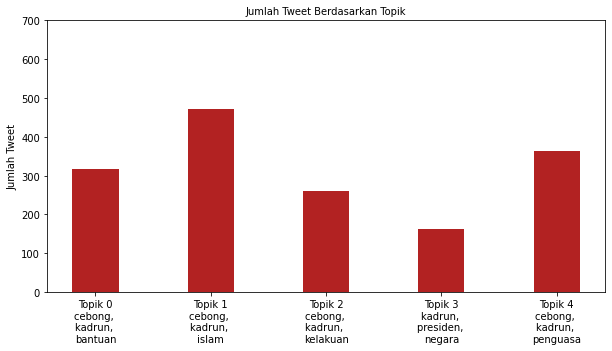

In [ ]:
stopword = ['iya','yang','cobain','gini','sedang','top',
'indonesia part','ngakak','bikin','random','free','bijak','gila','indonesia','part','the','terbaru',
'ini','kalian','auto','belakang','jadi','sendiri','bisa','ketemu','anjing','mimpi','toilet', 'coba', 'gelojoh', 'travelling', 'bengaluruh', 'from', 'sleman', 'bupati',
 'angkasa pura', 'mandatory', 'bengaluru', 'loops', 'gaiter', 'balaclava', 'mertua', 'di', 'kini',
'mamuju', 'kita','sobat', 'makmur', 'jaya', 'pratama', 'bintaro', 'panjang', 'umum', 'mantap', 'laksana', 'boleh',
 'harus', 'kamu', 'hanya', 'tak', 'tahu',  'bagaimana', 'gentar', 'bagai', 'ini', 'malaysia', 'per', 'tiap',
 'jak', 'para', 'lah', 'bagai', 'dengan', 'pagi', 'semua','lama', 'kalau', 'akun', 'banget', 'baik', 'mau', 'suka', 'apa', 'sama', 'aja', 'gak', 'ngab', 'mancity', 'chelsea',
 'aku', 'hari', 'mah', 'yuk', 'diam', 'bareng', 'say', 'kaum', 'porno', 'ratu', 'haha', 'orang', 'banyak', 'kebanyakan', 'ios', 'nya', 'sih', 'smp', 'jangan'
 , 'buat', 'jadinya','mulu', 'lihat', 'lebih', 'ibu', 'langsung', 'pengen', 'kan', 'mana', 'bukan', 'jam', 'kirim', 'anak', 'deh', 'biar', 'dong', 'ada'
 , 'tidak', 'lagi', 'kok', 'isinya', 'melulu', 'bahkan', 'cari', 'saya', 'sendiri', 'teman', 'kak', 'tuh', 'pernah', 'bagian', 'otak', 'emang', 'terus', 'punya', 'bebas', 'dlm',
 'mikir', 'bodoh', 'kepentingan', 'lain', 'baru', 'siapa', 'korban', 'mati', 'doang', 'profesional', 'kamus', 'cianjur', 'asal', 'bahasa', 'cap', 'gerombolan',
 'cma', 'versi', 'sedikit', 'kritis', 'dasar', 'namanya', 'narasi', 'masuk', 'pada', 'nyampe', 'kadrunista'
]
tokenizer = RegexpTokenizer(r'\w+')
# list for tokenized documents in loop
texts = []
# loop through document list
for i in doc_set:

    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]


    # add tokens to list
    texts.append(stopped_tokens)
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(3, 6):
	# generate LDA model
	ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
	#print(ldamodel.show_topics())
	# Compute Coherence Score
	coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
	coherence_lda = coherence_model_lda.get_coherence()
	print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)
# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()
# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False)
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots(figsize=(10,5))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.4, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topik ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah Tweet Berdasarkan Topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah Tweet')
ax1.set_ylim(0, 700)


plt.show()